In [1]:
# Importation des librairies
import pandas as pd

pd.set_option('display.max_colwidth', -1)

import sys
import os
import time
sys.path.append(os.path.dirname(os.getcwd()))

from code_project.data_science.utils_project import load_saved_file, read_feel, process_label, process_nlp, vectorize, apply_vectorization

In [2]:
PATH_DATA = "data/kaggle-traduction/translate_final.csv"

TYPE_VECTOR = "tf-idf"
UP_SAMPLING = True

In [3]:
data = pd.read_csv(PATH_DATA, sep=";")
data= data.drop(['Unnamed: 0', 'content'], axis=1)
data = data.fillna("")
data.sample(5)

,sentiment,translation,translation_yandex,translation_microsoft,translation_google
12310,hate,,"@katecameron2002 Oh, même ici, ne peux pas croire qu'ils l'ont tué de réduction! La haine Stringer maintenant!","@katecameron2002 Oh même ici, impossible de croire qu’ils l’ont tué hors tension ! Déteste Stringer maintenant !","@ katecameron2002 Oh pareil ici, je ne peux pas croire qu&#39;ils l&#39;ont tué! Déteste Stringer maintenant!"
11560,worry,,Ma plume juste a explosé dans ma main. Il y a de l'encre partout. Je suis maintenant une marche test de Rorschach.,Ma plume a juste soufflé dans ma main. Il n’y a encre partout. Je suis maintenant un test de Rorschach à pied.,Mon stylo vient de sauter dans ma main. Il y a de l&#39;encre partout. Je suis maintenant un test de Rorschach à pied.
15525,happiness,,"Dernier jour de vacances, je dois reprendre le travail de toute façon, de 2 semaines","Dernier jour des vacances, je dois se remettre au travail en tout cas, 2 semaines grands","Dernier jour de vacances, je dois rentrer au travail Quoi qu&#39;il en soit, 2 belles semaines"
28417,empty,,"Apparemment Ashland ne va jamais me dire si j'ai obtenu la bourse. Encore mon jour de congé 2e tasse de thé, toujours sur le canapé!","Apparemment, Ashland ne va jamais à me dire si j’ai obtenu la bourse d’études. Toujours mon jour de congé 2ème tasse de thé, toujours sur le canapé !","Apparemment, Ashland ne me dira jamais si j&#39;ai cette bourse. Toujours mon jour de congé 2ème tasse de thé, toujours sur le canapé!"
6633,worry,,Phooey! Ils ont prévu de faire du CAMPING pour ma réunion de classe. I. La Haine. Le Camping. ...et d'être la seule fille à gauche de ma classe de finissants.,Phooey ! Ils ont prévu de CAMPING pour ma réunion de classe. I. la haine. Le camping. .. .et étant la seule fille à gauche de ma classe.,Phooey! Ils ont planifié le CAMPING pour ma réunion de classe. Je déteste. Camping. ... et d&#39;être la seule fille célibataire de ma classe de finissants.


In [4]:
data.shape

(30000, 5)

In [5]:
test = data.sample(100)

In [6]:
# Traitement NLP des données
t1 = time.time()
test['nlp_yandex'] = process_nlp(test['translation_yandex'], process_type='stem', feel=False) # False Enlève les pseudos twitter

t2 = time.time()
print('NLP processed, duration {}s'.format(t2-t1))

NLP processed, duration 0.07768893241882324s


In [7]:
test.sample(5)

,sentiment,translation,translation_yandex,translation_microsoft,translation_google,nlp_yandex
14631,worry,,"besoin d'un nouvel emploi, soit près de la maison ou de la valeur de la voiture",a besoin d’un nouvel emploi soit plus proche à domicile ou d’une valeur de la voiture,a besoin d&#39;un nouveau travail soit plus près de chez lui ou vaut le détour,"[besoin, nouvel, emploi, pre, maison, valeur, voitur]"
15150,sadness,,"avait vraiment une drôle de nuit la nuit dernière, et rate ses amis",avait une nuit vraiment bizarre hier soir et ses amis ne manque,eu une nuit vraiment bizarre la nuit dernière et manque ses amis,"[vrai, drol, nuit, nuit, dernier, rat, amis]"
15121,worry,,"@drsteggy évidemment de ne pas avoir l'un des plus petits, je vais continuer à chercher. J'ai obtenu un vif chose, mais pour 7 $qui devrait le faire...","@drsteggy l’évidemment n’avait aucun des petits j’ai va continuer à chercher. J’ai eu une chose vive mais pour 7 $, ce qui devrait faire...",@drsteggy Il était évident qu&#39;il n&#39;y en avait aucun parmi les plus petits que je vais continuer à chercher. J&#39;ai une bonne idée pour 7 $ qui devrait faire l&#39;affaire ...,"[evident, ne, pas, avoir, plus, petit, vais, continu, a, cherch, obtenu, vif, chos, sept, devr, fair]"
19363,surprise,,j'ai perdu un adepte,J’ai perdu un adepte,j&#39;ai perdu un disciple,"[perdu, adept]"
8782,fun,,ce soir dans la partie w/ mes filles (moins de vita),ce soir en partie w / mes filles (moins de vita),ce soir en soirée avec mes filles (moins vita),"[soir, part, w, fill, moin, vit]"


In [8]:
# Traitement NLP des données
t1 = time.time()
test['nlp_yandex_lem'] = process_nlp(test['translation_yandex'], process_type='lemmatize', feel=False) # False Enlève les pseudos twitter

t2 = time.time()
print('NLP processed, duration {}s'.format(t2-t1))

NLP processed, duration 157.19530844688416s


In [9]:
test.sample(5)

,sentiment,translation,translation_yandex,translation_microsoft,translation_google,nlp_yandex,nlp_yandex_lem
3413,worry,,C'était et c'est parce que j'ai raté trop de jambe séances récemment.,C’était un et c’est parce que j’ai manqué trop de séances de jambe récemment.,C&#39;était un et c&#39;est parce que j&#39;ai manqué trop de sessions de jambes récemment.,"[etait, parc, rat, trop, jamb, seanc, recent]","[etait, parce, rater, trop, jambe, seances, recemment]"
20365,surprise,,Oups ce serait #edaust09,"Oups, ce serait #edaust09",Oups ça serait # edaust09,"[oup, edaust09]","[oups, edaust09]"
5886,sadness,,Je pense que je suis sur le point de briser mon propre cœur. (comme emo qui sonne)... meh.,Je pense que je suis sur le point de briser mon cœur. (en tant qu’emo que cela puisse paraître)... meh.,Je pense que je suis sur le point de briser mon propre coeur. (aussi emo que cela puisse paraître) ... meh.,"[pens, point, bris, propr, cur, comm, emo, son, meh]","[penser, poindre, briser, propre, cur, comme, emo, sonner, meh]"
14870,love,,La Cause de ces stupides que les gens n'ont pas de mon téléphone et mon ventre herts,Provoquer ces imbéciles n’ont pas mon téléphone et mon ventre herts,Parce que ces personnes stupides n&#39;ont pas mon téléphone et mon ventre herts,"[caus, stupid, le, gen, n, pas, telephon, ventr, hert]","[causer, stupides, les, gens, n, pas, telephone, ventre, herts]"
14449,neutral,,"@sjzara Le peu de pleurs nerveux fille a été mis à travers... avec un 12 ans très bonne danse garçon. Greg, la jolie chanteuse a terminé en 3e",@sjzara la petite fille qui pleure de nerveuse a été mis à... avec un garçon danse assez bonne âgé de 12 ans. Greg la belle chanteuse est venu 3e,@sjzara La petite fille nerveuse qui pleure a été mise en contact avec un garçon de 12 ans qui danse très bien. Greg la belle chanteuse est 3ème,"[peu, pleur, nerveux, fill, a, ete, mis, a, traver, douz, an, tre, bon, dans, garcon, greg, jol, chanteux, a, termin, 3e]","[peu, pleurs, nerveux, fille, avoir, ete, mettre, avoir, travers, douze, ans, tres, bonne, danser, garcon, greg, jolie, chanteuse, avoir, terminer, 3e]"


In [10]:
import numpy as np
# define documents
docs = ['Well done!',
		'Good work',
		'Great effort',
		'nice work',
		'Excellent!',
		'Weak',
		'Poor effort!',
		'not good',
		'poor work',
		'Could have done better.']
# define class labels
labels = np.array([1,1,1,1,1,0,0,0,0,0])

In [11]:
from keras.preprocessing.text import one_hot
# integer encode the documents
vocab_size = 50
encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)

Using TensorFlow backend.


[[23, 10], [34, 25], [4, 6], [11, 25], [43], [8], [49, 6], [46, 34], [49, 25], [36, 23, 10, 7]]


In [3]:
# Importation des librairies

import numpy as np 
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re
import sys
import time
import os
sys.path.append(os.path.dirname(os.getcwd()))

from code_project.data_science.utils_project import load_saved_file, read_feel, process_label, process_nlp, vectorize, apply_vectorization
from code_project.data_science.evaluate import load_test_set, evaluate_model
from code_project.config_project import *

Using TensorFlow backend.


In [12]:
# Lecture des données
PATH_DATA = "data/kaggle-traduction/translate_final_lemmatized.csv"

data = pd.read_csv(PATH_DATA, sep=";", encoding='utf-8')
data = data.drop(['Unnamed: 0'], axis=1)
data = data.fillna("")
data.head(5)

# Si True alors on prédit sur chaque mot puis on agrège la prédiction
PREDICT_WORD = True

FileNotFoundError: [Errno 2] File b'data/kaggle-traduction/translate_final_lemmatized.csv' does not exist: b'data/kaggle-traduction/translate_final_lemmatized.csv'

In [17]:
TEST_SET_PATH = "data/test_set_trad_lem.csv"
data_test = pd.read_csv(TEST_SET_PATH, sep=";", encoding='utf-8')
data_test.sample(5)

FileNotFoundError: [Errno 2] File b'data/test_set_trad_lem.csv' does not exist: b'data/test_set_trad_lem.csv'

In [14]:
# On ne garde que certains sentiments
data.loc[data.sentiment == 'hate', ['sentiment']] = 'anger'
data.loc[data.sentiment == 'enthusiasm', ['sentiment']] = 'joy'
data.loc[data.sentiment == 'fun', ['sentiment']] = 'joy'
data.loc[data.sentiment == 'worry', ['sentiment']] = 'fear'
data.loc[data.sentiment == 'happiness', ['sentiment']] = 'joy'
data.loc[data.sentiment == 'love', ['sentiment']] = 'love'
data = data.loc[~data.sentiment.isin(['boredom', 'relief', 'empty'])]
data.sentiment.value_counts()

fear        7433
neutral     6340
sadness     4828
joy         4596
love        2068
surprise    1613
anger       1285
Name: sentiment, dtype: int64

In [15]:
data.sample(2)

,sentiment,translation,translation_yandex,translation_microsoft,translation_google
26031,surprise,,ses castiel!!!! [ angle ],ses castiel !!! [l’angle],c&#39;est castiel !!!! [ l&#39;angle ]
23216,joy,,"@MiaMiaDC Bon matin MiaMiaDC Mon week-end était génial et je viens d'avoir mon lundi, qui était aussi génial j'espère que vous avez une merveilleuse journée!","@MiaMiaDC Bonjour MiaMiaDC mon week-end a été formidable et je viens d’avoir mon lundi, qui a été aussi grande, que je vous souhaite une merveilleuse journée !","@MiaMiaDC Bonjour MiaMiaDC Mon week-end a été formidable et je viens d&#39;avoir mon lundi, qui était également formidable. J&#39;espère que vous passerez une journée merveilleuse!"


In [16]:
data_test.sample(2)

NameError: name 'data_test' is not defined

In [24]:
print(data['nlp_google'].values[0])

['layin', 'n', 'lire', 'mal', 'tete', 'ughhhh', 'attendre', 'appel']


In [10]:
max_features = data['nlp_google'].count()
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(data['nlp_google'].values)
print(data['nlp_google'].values)
X_train = tokenizer.texts_to_sequences(data['nlp_google'].values)
print(X_train[0])
X_train = pad_sequences(X_train, padding='pre', maxlen=50)

print('train shape : {}'.format((len(X_train), len(X_train[0]))))

["['layin', 'n', 'lire', 'mal', 'tete', 'ughhhh', 'attendre', 'appel']"
 "['ceremonie', 'funebre', 'triste', 'vendredi']"
 "['vouloir', 'sortir', 'amis', 'bientot']" ...
 "['comedie', 'bonne', 'chance', 'ami']"
 "['stephs', 'grad', 'party', 'gr8', 'pousser', 'gateau', 'visage', 'watchd', 'seoir', 'chienner', 'gifler', 'garcon', 'manger', 'bonne', 'nourriture', 'satisfaire']"
 "['sweeeeet', 'san', 'fran', 'genial', 'aimer', 'bas']"]
[6628, 8, 88, 41, 132, 2695, 85, 620]
train shape : (28163, 50)


In [114]:
X_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0, 6628,    8,
         88,   41,  132, 2695,   85,  620])

In [19]:
import gensim 
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(data['nlp_google'].values)

In [20]:
max_features = data['nlp_google'].count()
max_features

28163

In [40]:
X_train.shape[1]

50

In [21]:
# Définition du modèle de deep learning à utiliser
embed_dim = 128
lstm_out = 196
from keras import regularizers
model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length = X_train.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(7, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 128)           3604864   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 50, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 1379      
Total params: 3,861,043
Trainable params: 3,861,043
Non-trainable params: 0
_________________________________________________________________


In [1]:
from keras.utils import plot_model
import pydot

Using TensorFlow backend.


In [2]:
plot_model(model, to_file='model.png')

NameError: name 'model' is not defined

In [23]:
# Split the output
df_Y = pd.get_dummies(data['sentiment'])
Y = df_Y.values
labels = list(df_Y.columns)
map_label = {}
for i, val in enumerate(labels):
    map_label[i] = val
print(Y)
print(map_label)

[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]]
{0: 'anger', 1: 'fear', 2: 'joy', 3: 'love', 4: 'neutral', 5: 'sadness', 6: 'surprise'}


In [101]:
feat_train

array([[   0,    0,    0, ..., 2695,   85,  620],
       [   0,    0,    0, ..., 9600,   56,  149],
       [   0,    0,    0, ...,   90,  170,  159],
       ...,
       [   0,    0,    0, ...,   22,  118,  651],
       [   0,    0,    0, ...,    4, 1016,   27],
       [   0,    0,    0, ..., 2139,  139,  127]])

In [24]:
# Fit the model
batch_size = 32
model.fit(X_train, Y, epochs = 10, batch_size=batch_size, verbose = 2)

Epoch 1/10
 - 45s - loss: 1.7022 - acc: 0.3233
Epoch 2/10
 - 47s - loss: 1.5057 - acc: 0.4229
Epoch 3/10
 - 54s - loss: 1.3537 - acc: 0.4927
Epoch 4/10
 - 53s - loss: 1.1954 - acc: 0.5642
Epoch 5/10
 - 53s - loss: 1.0755 - acc: 0.6091
Epoch 6/10
 - 53s - loss: 0.9761 - acc: 0.6522
Epoch 7/10
 - 54s - loss: 0.8940 - acc: 0.6852
Epoch 8/10
 - 56s - loss: 0.8312 - acc: 0.7013
Epoch 9/10
 - 58s - loss: 0.7687 - acc: 0.7238
Epoch 10/10
 - 53s - loss: 0.7141 - acc: 0.7432


In [22]:
def most_common(lst):
    lst = [el for el in lst if el != 'no_emotion']
    if len(lst) == 0:
        return 'no_emotion'
    else:
        return max(set(lst), key=lst.count)
    
def predict(x_test, tokenizer, model, predict_word):
    
    predictions = []
    
    for sentence in x_test:
        if predict_word:
            list_emotion_word = []
            for word in sentence.split(" "):
                txt = tokenizer.texts_to_sequences([word])
                txt = pad_sequences(txt, maxlen=50)
                sentiment = model.predict(txt, batch_size=1, verbose = 2)[0]
                list_emotion_word.append(map_label[np.argmax(sentiment)])
            predictions.append(most_common(list_emotion_word))
        else:
            txt = tokenizer.texts_to_sequences([sentence])
            print(sentence)
            txt = pad_sequences(txt, maxlen=50)
            sentiment = model.predict(txt, batch_size=1, verbose = 2)[0]
            predictions.append(map_label[np.argmax(sentiment)])
    
    return predictions

In [23]:
# Calcul du score final
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
pd.set_option('display.max_colwidth', -1)

y_test = y_test = data_test['emotion']

predictions = predict(data_test['phrase_lem'], tokenizer, model, predict_word=False)

accuracy = accuracy_score(y_test, predictions)
conf_mat = confusion_matrix(y_test, predictions)

print(accuracy)
print(conf_mat)

['triste', 'dire', 'kh3', 'dernier', 'kingdom', 'hearts']


NameError: name 'map_label' is not defined

In [16]:
plot_confusion_matrix(conf_mat, target_names=['anger','fear', 'joy', 'love', 'neutral', 'sadness', 'surprise'])

NameError: name 'plot_confusion_matrix' is not defined

In [46]:
print({0: 'anger', 1: 'fear', 2: 'joy', 3: 'love', 4: 'neutral', 5: 'sadness', 6: 'surprise'})

{0: 'anger', 1: 'fear', 2: 'joy', 3: 'love', 4: 'neutral', 5: 'sadness', 6: 'surprise'}


In [39]:
data_test['predictions'] = predictions

In [40]:
data_test.sample(5)

,Unnamed: 0,phrase,emotion,phrase_lem,predictions
231,231,tes cheveux sont très jolis,love,"['cheveux', 'tres', 'jolis']",love
242,242,il dispose les assiettes comme chaque jour,neutral,"['disposer', 'les', 'assiettes', 'comme', 'chaque', 'jour']",joy
259,259,Trop hate que le week-end arrive pour retrouver toute ma merveilleuse famille,love,"['trop', 'hate', 'week', 'end', 'arriver', 'retrouver', 'toute', 'merveilleuse', 'famille']",love
152,152,"On a plein de cadeaux pour vous, vous allez voir",surprise,"['avoir', 'plein', 'cadeaux', 'aller', 'voir']",sadness
93,93,soutien total à toute l'équipe,neutral,"['soutien', 'total', 'avoir', 'toute', 'equipe']",love


In [41]:
data_test.to_csv('first_result_with_lem.csv')

# Test GRU

In [16]:
# Importation des librairies

import numpy as np 
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, GRU
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re
import sys
import time
import os
sys.path.append(os.path.dirname(os.getcwd()))

from code_project.data_science.utils_project import load_saved_file, read_feel, process_label, process_nlp, vectorize, apply_vectorization
from code_project.data_science.evaluate import load_test_set, evaluate_model
from code_project.config_project import *

In [2]:
# Lecture des données
PATH_DATA = "data/kaggle-traduction/translate_final_lemmatized.csv"

data = pd.read_csv(PATH_DATA, sep=";", encoding='utf-8')
data= data.drop(['Unnamed: 0'], axis=1)
data = data.fillna("")
data.head(5)

# Si True alors on prédit sur chaque mot puis on agrège la prédiction
PREDICT_WORD = True

In [6]:
TEST_SET_PATH = "data/test_set_trad_lem.csv"
data_test = pd.read_csv(TEST_SET_PATH, sep=";", encoding='utf-8')
data_test.sample(5)

,Unnamed: 0,phrase,emotion,phrase_lem
201,201,Il était vraiment très anxieux à l'attente de ...,fear,"['etait', 'vraiment', 'tres', 'anxieux', 'avoi..."
2,2,il fait beau,neutral,"['faire', 'beau']"
176,176,Stefano pestait contre les nids de poules qui ...,anger,"['stefano', 'pester', 'contrer', 'les', 'nids'..."
256,256,J'adore aller me balader dans Paris ! Cette vi...,love,"['adorer', 'aller', 'balader', 'paris', 'cette..."
223,223,Ah Marc vient finalement à la soirée ? Je pens...,surprise,"['ah', 'marc', 'venir', 'finalement', 'avoir',..."


In [11]:
data.sample(3)

,sentiment,translation,translation_yandex,translation_microsoft,translation_google,nlp_google,nlp_sentence
18124,fear,,"Pauvre Johnny est malade, on dirait qu'il va l...",Pauvre Johnny est malade on dirait qu’il vais ...,Le pauvre Johnny est malade On dirait qu'il ir...,"['pauvre', 'johnny', 'malade', 'dire', 'aller'...",pauvr johnny malad dir ira chez veterinair demain
1767,sadness,,@itstayloryall Im si triste que vous nous avez...,@itstayloryall Im si triste que vous nous avez...,@ itstayloryall Je suis si triste que tu nous ...,"['si', 'triste', 'manquer', 'avoir', 'reunion'...",si trist manqu a reunion famill
1982,neutral,,"doit aller au lit, mais ne peut pas dormir tou...","doit aller au lit, mais ne peut pas dormir tou...",devrait aller au lit mais ne peut pas dormir m...,"['devoir', 'aller', 'lire', 'ne', 'pouvoir', '...",devr aller lit ne peut pas dorm mainten


In [7]:
# On ne garde que certains sentiments
data.loc[data.sentiment == 'hate', ['sentiment']] = 'anger'
data.loc[data.sentiment == 'enthusiasm', ['sentiment']] = 'joy'
data.loc[data.sentiment == 'fun', ['sentiment']] = 'joy'
data.loc[data.sentiment == 'worry', ['sentiment']] = 'fear'
data.loc[data.sentiment == 'happiness', ['sentiment']] = 'joy'
data.loc[data.sentiment == 'love', ['sentiment']] = 'love'
data = data.loc[~data.sentiment.isin(['boredom', 'relief', 'empty'])]
data.sentiment.value_counts()

fear        7433
neutral     6340
sadness     4828
joy         4596
love        2068
surprise    1613
anger       1285
Name: sentiment, dtype: int64

In [12]:
max_features = data['nlp_google'].count()
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(data['nlp_google'].values)
X_train = tokenizer.texts_to_sequences(data['nlp_google'].values)
X_train = pad_sequences(X_train, padding='pre', maxlen=50)

print('train shape : {}'.format((len(X_train), len(X_train[0]))))

train shape : (28163, 50)


In [13]:
import gensim 
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(data['nlp_google'].values)

In [14]:
max_features = data['nlp_google'].count()
max_features

28163

In [17]:
# Définition du modèle de deep learning à utiliser
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length = X_train.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(GRU(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(7, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 128)           3604864   
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 50, 128)           0         
_________________________________________________________________
gru_1 (GRU)                  (None, 196)               191100    
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 1379      
Total params: 3,797,343
Trainable params: 3,797,343
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Split the output
df_Y = pd.get_dummies(data['sentiment'])
Y = df_Y.values
labels = list(df_Y.columns)
map_label = {}
for i, val in enumerate(labels):
    map_label[i] = val
print(Y)
print(map_label)

[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]]
{0: 'anger', 1: 'fear', 2: 'joy', 3: 'love', 4: 'neutral', 5: 'sadness', 6: 'surprise'}


In [19]:
# Fit the model
batch_size = 64
model.fit(X_train, Y, epochs = 10, batch_size=batch_size, verbose = 2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
 - 64s - loss: 1.6902 - acc: 0.3300
Epoch 2/10
 - 62s - loss: 1.4815 - acc: 0.4350
Epoch 3/10
 - 63s - loss: 1.2920 - acc: 0.5185
Epoch 4/10
 - 62s - loss: 1.1019 - acc: 0.5994
Epoch 5/10
 - 59s - loss: 0.9416 - acc: 0.6668
Epoch 6/10
 - 59s - loss: 0.8142 - acc: 0.7116
Epoch 7/10
 - 57s - loss: 0.7227 - acc: 0.7438
Epoch 8/10
 - 58s - loss: 0.6538 - acc: 0.7659
Epoch 9/10
 - 60s - loss: 0.5935 - acc: 0.7857
Epoch 10/10
 - 58s - loss: 0.5469 - acc: 0.8047


In [20]:
def most_common(lst):
    lst = [el for el in lst if el != 'no_emotion']
    if len(lst) == 0:
        return 'no_emotion'
    else:
        return max(set(lst), key=lst.count)
    
def predict(x_test, tokenizer, model, predict_word):
    
    predictions = []
    
    for sentence in x_test:
        if predict_word:
            list_emotion_word = []
            for word in sentence.split(" "):
                txt = tokenizer.texts_to_sequences([word])
                txt = pad_sequences(txt, maxlen=50)
                sentiment = model.predict(txt, batch_size=1, verbose = 2)[0]
                list_emotion_word.append(map_label[np.argmax(sentiment)])
            predictions.append(most_common(list_emotion_word))
        else:
            txt = tokenizer.texts_to_sequences([sentence])
            txt = pad_sequences(txt, maxlen=50)
            sentiment = model.predict(txt, batch_size=1, verbose = 2)[0]
            predictions.append(map_label[np.argmax(sentiment)])
    
    return predictions

In [23]:
# Calcul du score final
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
pd.set_option('display.max_colwidth', -1)

y_test = y_test = data_test['emotion']

predictions = predict(data_test['phrase_lem'], tokenizer, model, predict_word=False)

accuracy = accuracy_score(y_test, predictions)
conf_mat = confusion_matrix(y_test, predictions)

print(accuracy)
print(conf_mat)

0.3660377358490566
[[ 4 12  3  0 13  4  0]
 [ 2 17  5  2  9  2  4]
 [ 0  6 26  5  5  5  1]
 [ 1  2  4 11  1  1  1]
 [ 2  4  7  4 21  2  0]
 [ 0 19  1  1  5  9  2]
 [ 0 11  9  4  7  2  9]]


In [24]:
print({0: 'anger', 1: 'fear', 2: 'joy', 3: 'love', 4: 'neutral', 5: 'sadness', 6: 'surprise'})

{0: 'anger', 1: 'fear', 2: 'joy', 3: 'love', 4: 'neutral', 5: 'sadness', 6: 'surprise'}


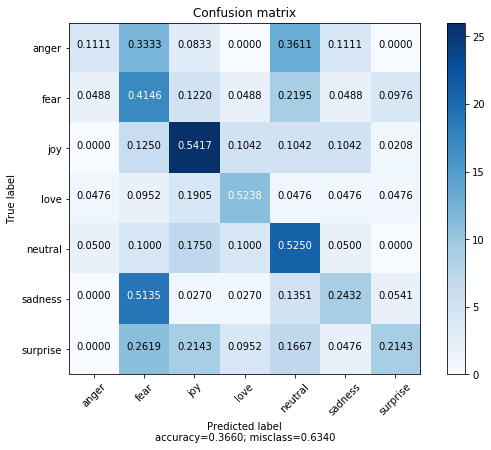

In [27]:
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.

    cm is the confusion matrix to use
    target names is the list of labels
    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


plot_confusion_matrix(conf_mat, target_names=['anger','fear', 'joy', 'love', 'neutral', 'sadness', 'surprise'])
